<h>Boston House Pricing Project</h>

In [ ]:
# pip install matplotlib==3.7.3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

* Loading the Boston Dataset

Explain the feature
Variables There are 14 attributes in each case of the dataset. They are:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full value property tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* LSTAT - lower status of the population
* MEDV - Median value of owner-occupied homes in 1000's

* Our Target Variable is MEDV

In [2]:
boston=pd.read_csv('C:/Users/Bhuvan Kothari/Data_science_Projects/Git_project_Boston/HousingData.csv')
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### Exploratory Data Analysis (EDA)

In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# Checking the count of null values in the data
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
# We will check the duplicates
boston.duplicated().unique()

array([False])

In [7]:
# Taking the Statstistical Summary of the data
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# Replacing the missing values with 0
boston.fillna(0,inplace=True)

In [9]:
# Checking the Statistical Summary again
boston.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.99])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.469112,10.768775,10.645889,0.067194,0.554695,6.284634,65.810277,3.795043,9.549407,408.237154,18.455534,356.674032,12.212846,22.532806
std,8.574755,23.025124,7.039321,0.250605,0.115878,0.702617,30.520606,2.105710,8.707259,168.537116,2.164946,91.294864,7.438324,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,0.000000,1.129600,1.000000,187.000000,12.600000,0.320000,0.000000,5.000000
10%,0.030810,0.000000,2.240000,0.000000,0.427000,5.593500,19.600000,1.628300,3.000000,233.000000,14.750000,290.270000,3.990000,12.750000
25%,0.068907,0.000000,4.877500,0.000000,0.449000,5.885500,40.425000,2.100175,4.000000,279.000000,17.400000,375.377500,6.590000,17.025000
50%,0.224635,0.000000,8.560000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,10.925000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
95%,15.789150,80.000000,19.580000,1.000000,0.740000,7.587500,100.000000,7.827800,24.000000,666.000000,21.000000,396.900000,26.807500,43.400000
99%,41.370330,90.000000,25.650000,1.000000,0.871000,8.335000,100.000000,9.222770,24.000000,666.000000,21.200000,396.900000,33.918500,50.000000


In [10]:
# Correlation between the features
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185559,0.379772,-0.055713,0.410918,-0.220340,0.328997,-0.365901,0.600505,0.559880,0.278243,-0.364886,0.411330,-0.384120
ZN,-0.185559,1.000000,-0.482670,-0.032992,-0.498619,0.312295,-0.470146,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.361012,0.362292
INDUS,0.379772,-0.482670,1.000000,0.055833,0.690250,-0.339054,0.488737,-0.662476,0.564867,0.687468,0.372852,-0.341514,0.492359,-0.441371
CHAS,-0.055713,-0.032992,0.055833,1.000000,0.070867,0.106797,0.054485,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.040427,0.183844
NOX,0.410918,-0.498619,0.690250,0.070867,1.000000,-0.302188,0.627476,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.549209,-0.427321
RM,-0.220340,0.312295,-0.339054,0.106797,-0.302188,1.000000,-0.227535,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.584754,0.695360
AGE,0.328997,-0.470146,0.488737,0.054485,0.627476,-0.227535,1.000000,-0.641898,0.420382,0.459859,0.239508,-0.214615,0.503452,-0.356699
DIS,-0.365901,0.632428,-0.662476,-0.092318,-0.769230,0.205246,-0.641898,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.456922,0.249929
RAD,0.600505,-0.300061,0.564867,-0.003339,0.611441,-0.209847,0.420382,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.438134,-0.381626
TAX,0.559880,-0.304385,0.687468,-0.035822,0.668023,-0.292048,0.459859,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.494026,-0.468536


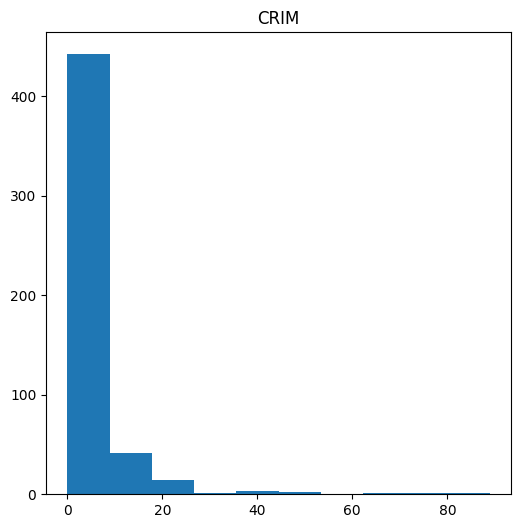

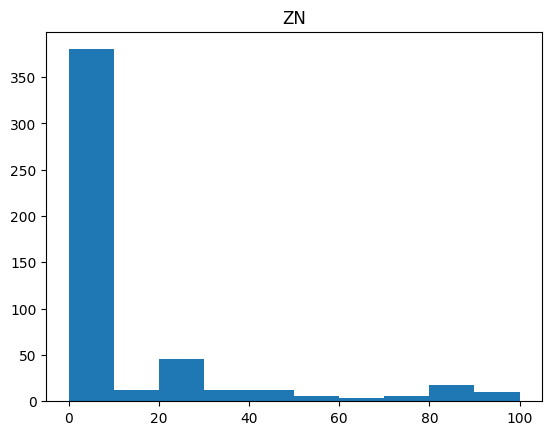

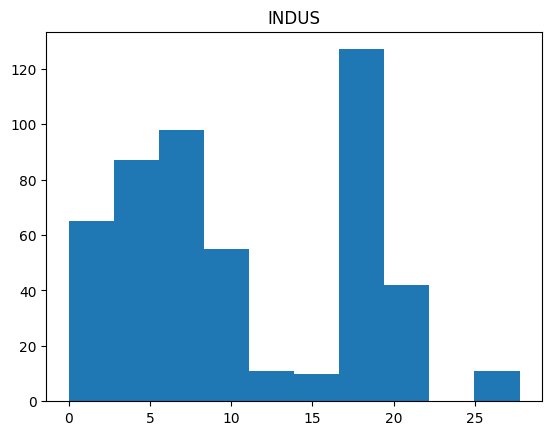

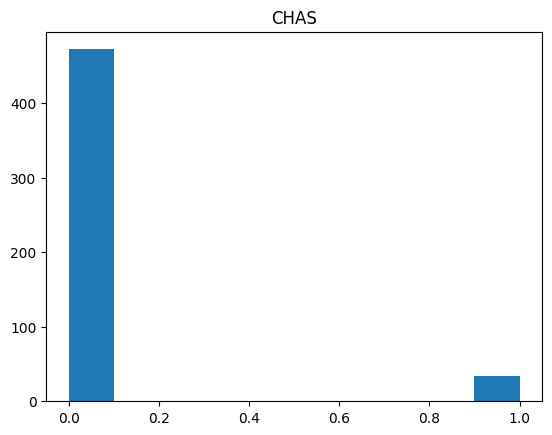

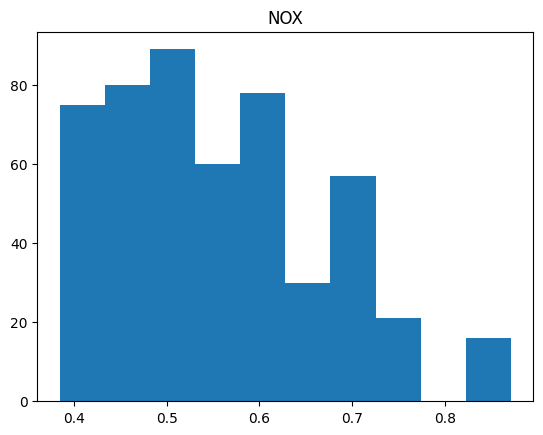

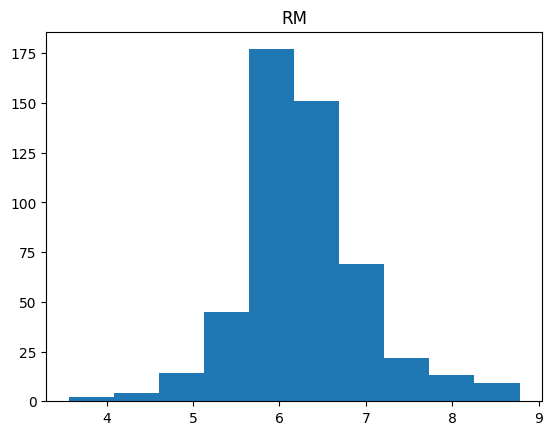

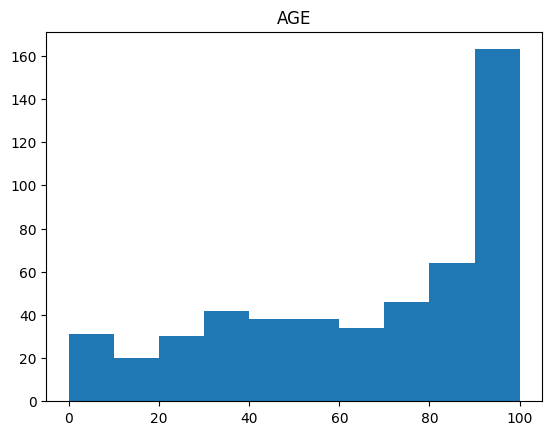

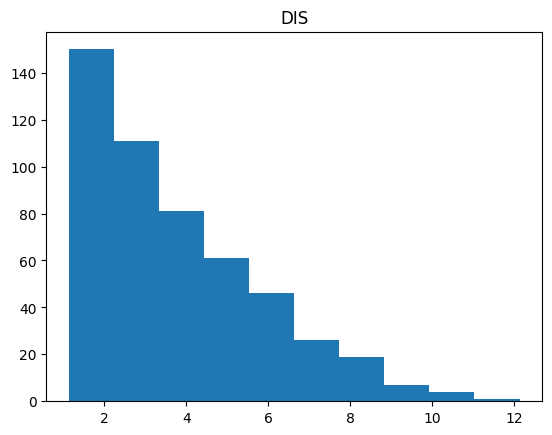

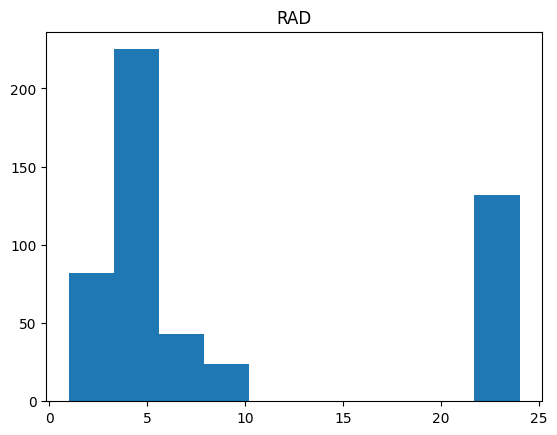

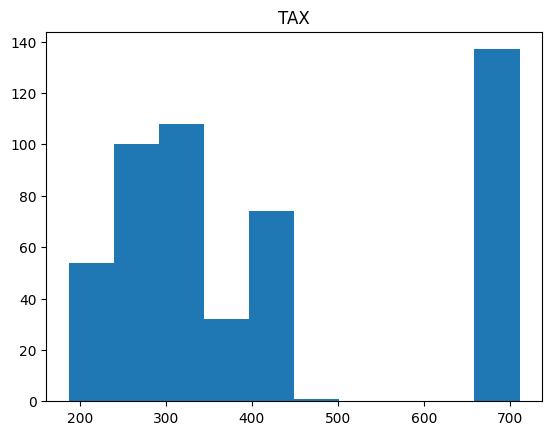

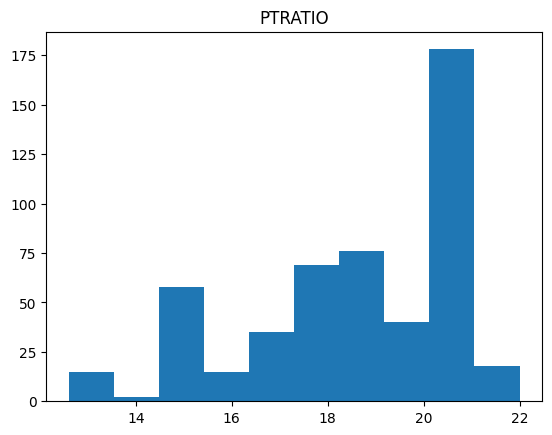

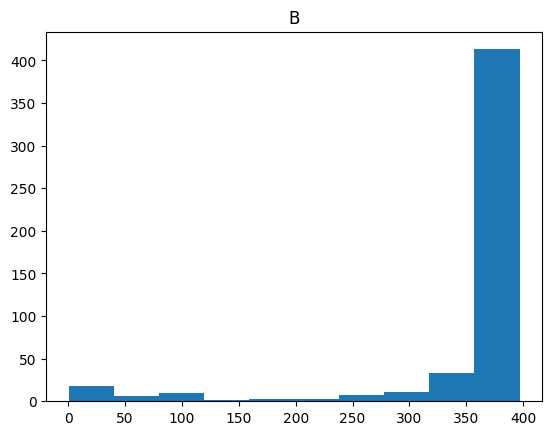

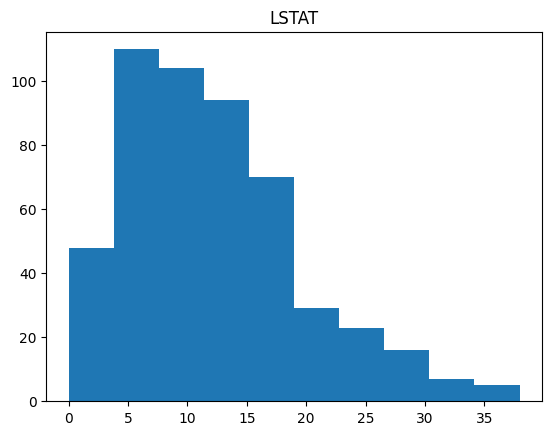

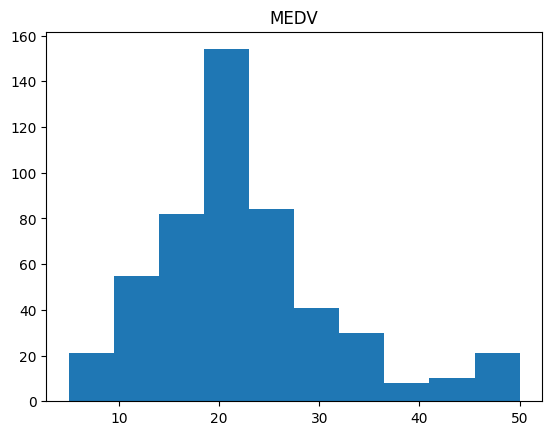

In [11]:
# Historgram of the data features
plt.figure(figsize=(6,6))
for i in boston.columns:
    plt.hist(boston[i])
    plt.title(i)
    plt.show()

Observation: Almost all Features are having Skewed Distributions except MEDV and RM

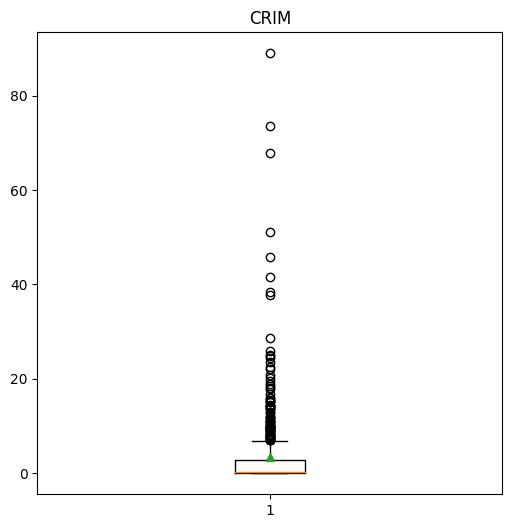

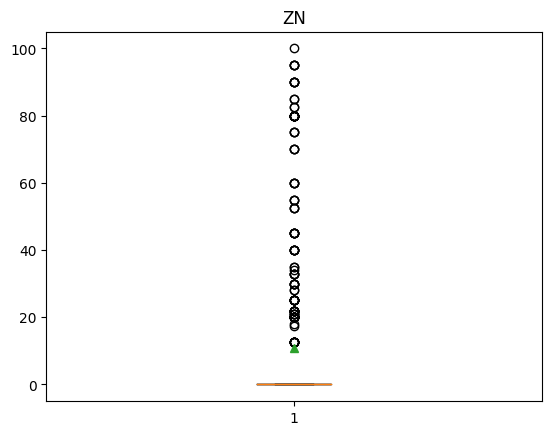

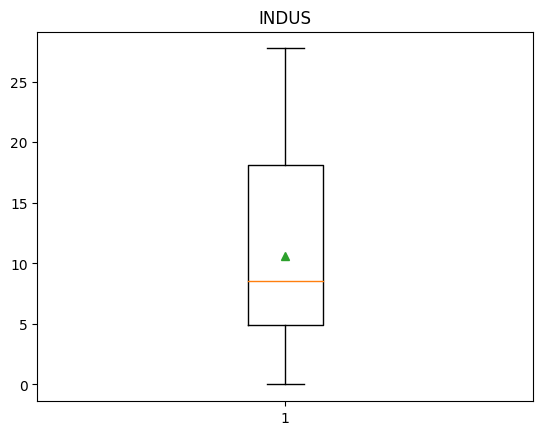

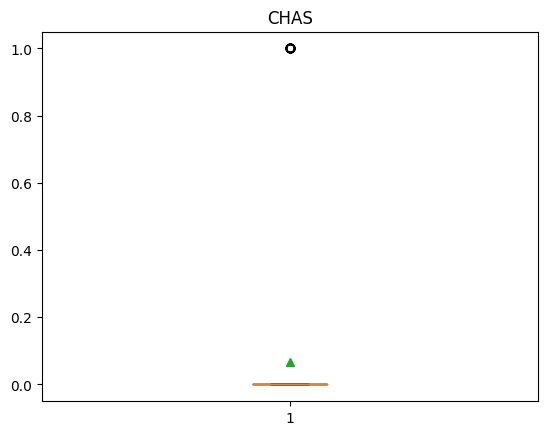

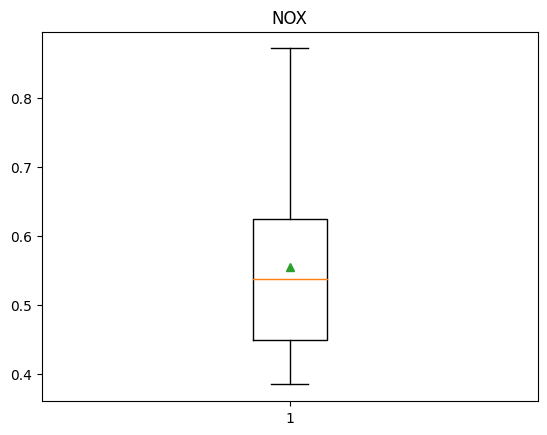

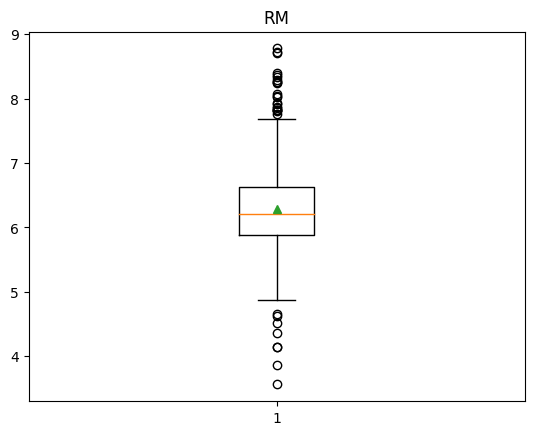

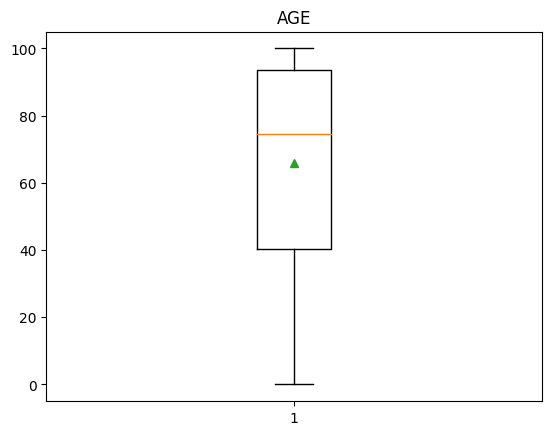

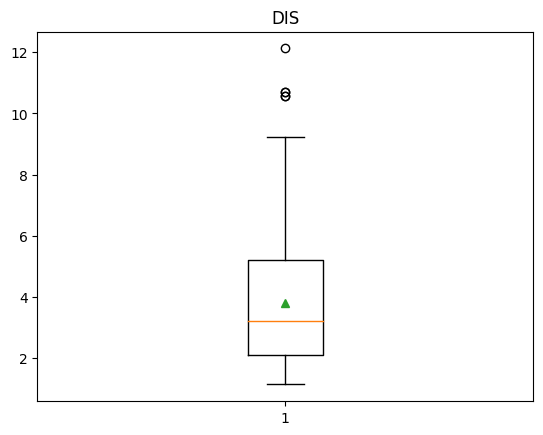

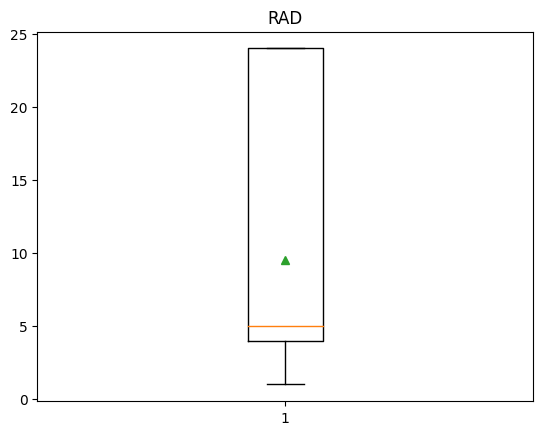

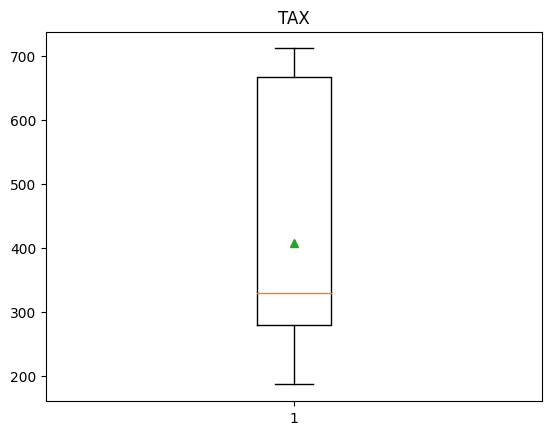

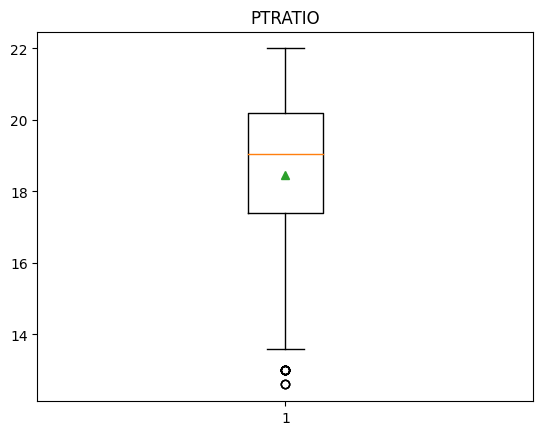

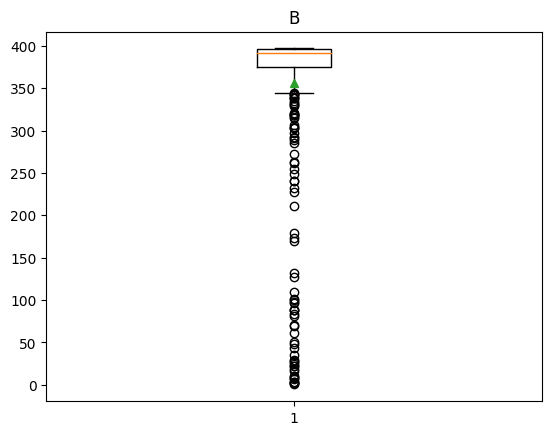

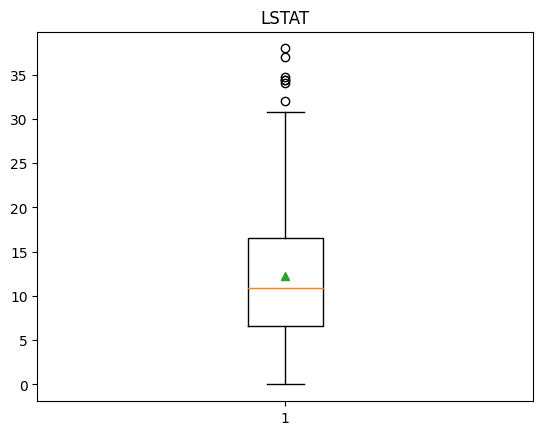

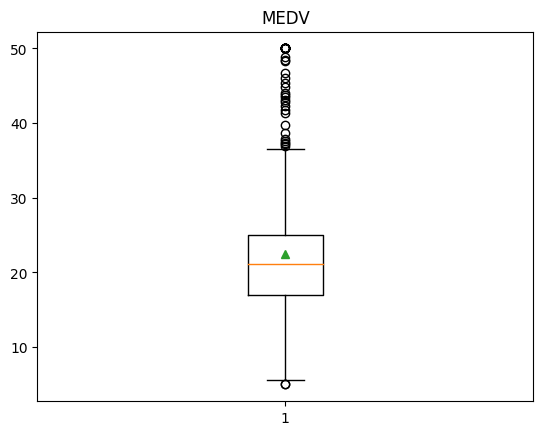

In [12]:
# Box-Whiskr PLots to check understand IQR and Outliers
plt.figure(figsize=(6,6))
for i in boston.columns:
    plt.boxplot(boston[i], showmeans=True)
    plt.title(i)
    plt.show()

We can see there are lot of Outliers in almost Half of the features, we will tackle them during the Modeling.

### Correlation Analysis for Regression

<AxesSubplot:>

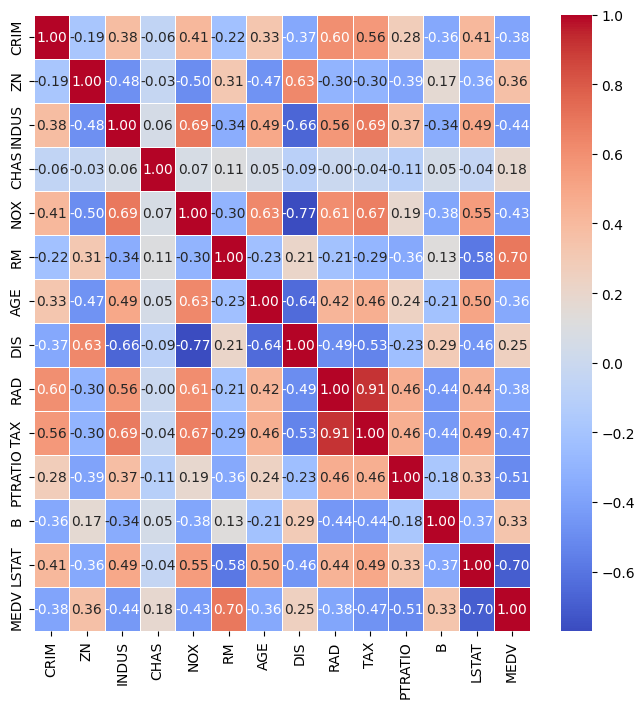

In [15]:
# Creating the Heatmap first
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(boston.corr(),fmt=".2f",linewidth=0.5,cmap="coolwarm",annot=True)

Observations: 
* High correlation of independent features with target variable MEDV: LSTAT,PTRATIO, TAX,RAD,RM,NOX,INDUS,CRIM
* Now highly correlated independent features (considering correlation more than 0.8):TAX-RAD

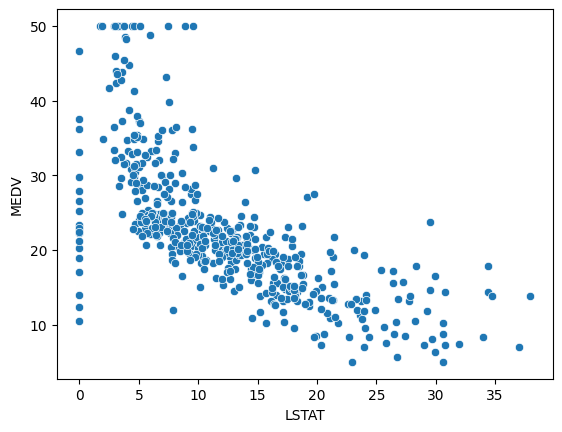

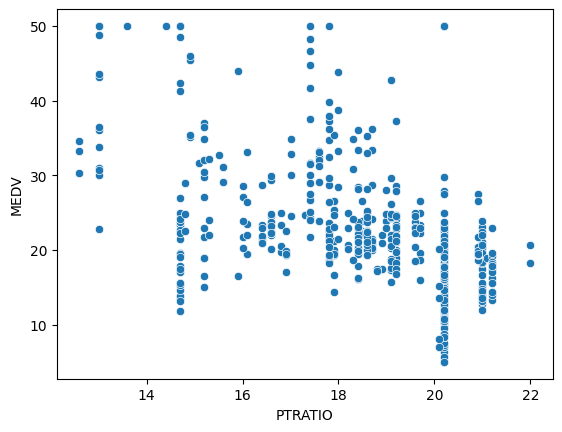

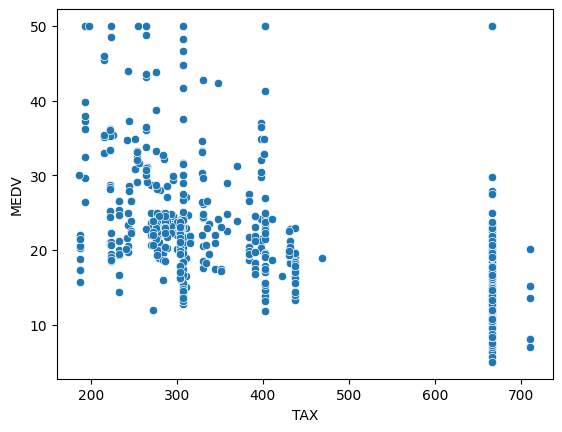

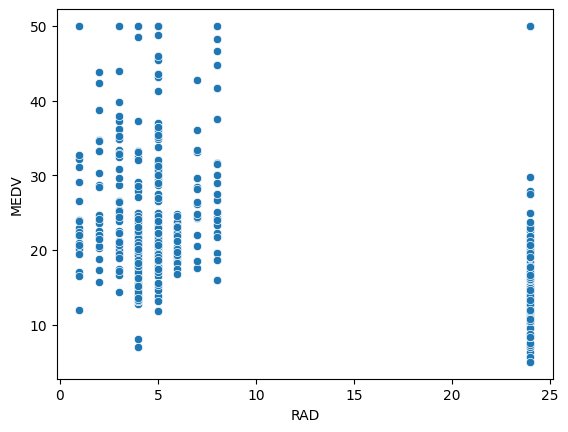

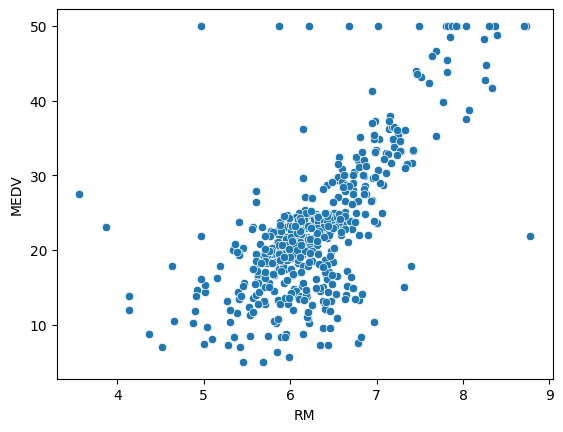

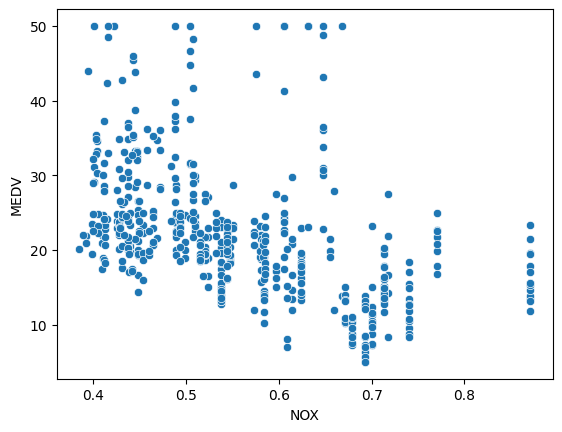

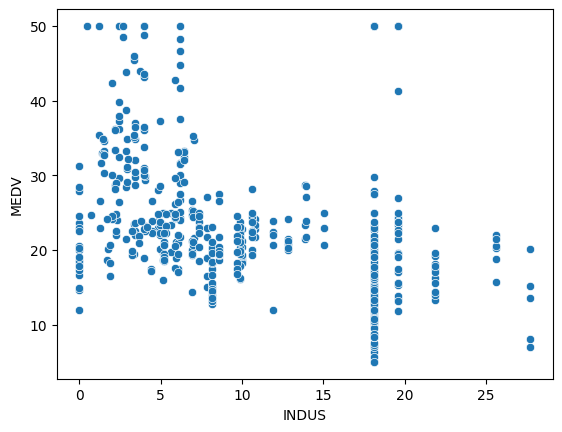

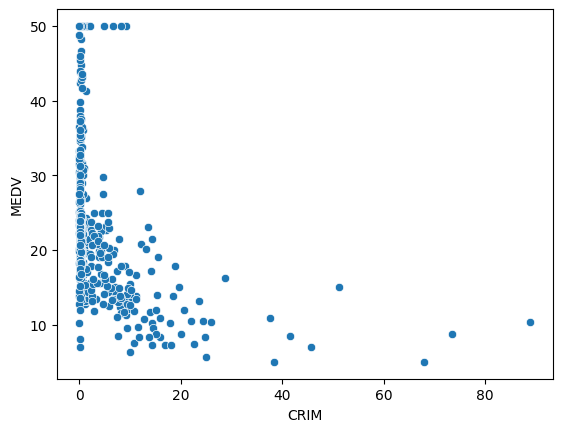

In [16]:
# Analyzing the Correlated Independent and Target variables
correlated_var=['LSTAT','PTRATIO', 'TAX','RAD','RM','NOX','INDUS','CRIM']

# Now plotting the scatter plots between the varaibles
for c in correlated_var:
    sns.scatterplot(x=boston[c],y=boston['MEDV'])
    plt.show()

Observations:
* LSTAT vs MDEV: Plot shows that as the LSAT values increases initially prices stayed in slightly upper range but then Price decreases further with increase in LSTAT.
* PTRATIO vs MDEV: PLot shows that as no. of Pupils per teacher in a town increases the Housing price (MDEV) decreases. Reason can be the decrease in quality of education when less teachers tackle more stundents.
* TAX vs MEDV: After a certain Tax value, the prices only decreases with Tax increase.
* RM vs MEDV: Naturally, prices increases with increase in Rooms and therefore a clear linear relation is visible
* NOX vs MEDV: Similar to tax, after certain values of NOX, the prices decreases.
* INDUS vs MEDV: This plot shows after initial increase in prices with INDUS, the prices further decreases drastically with increase in INDUS, indicating a presence of exponential relation.
* CRIM vs MEDV: This plot shows sharp decrease in Prices even with slight increase in crime and thus indicating a strong exponental relation.


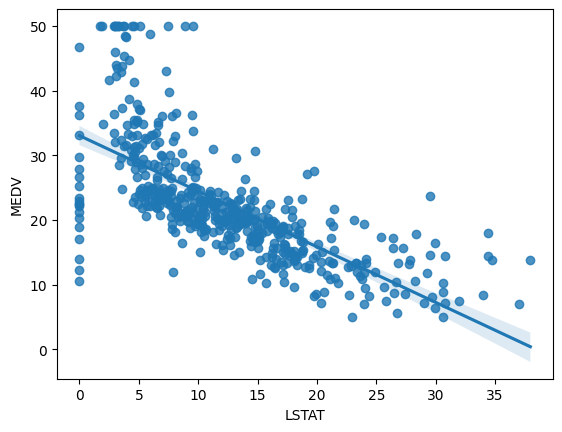

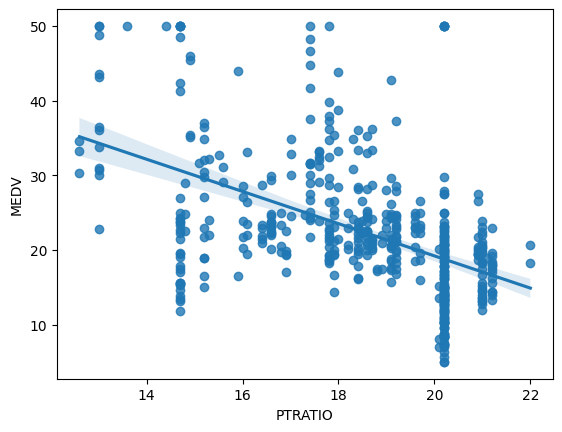

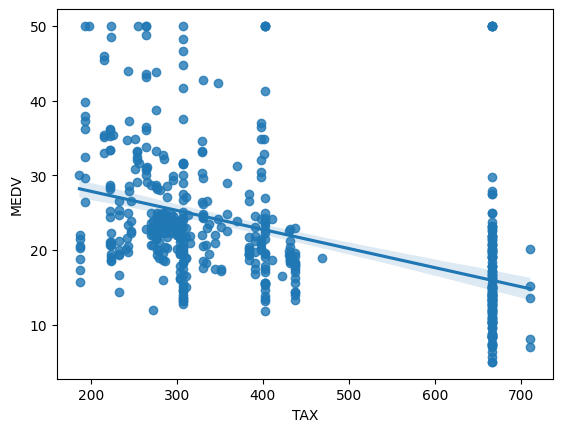

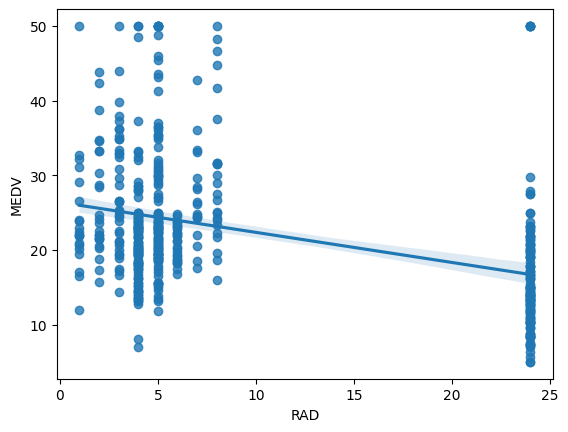

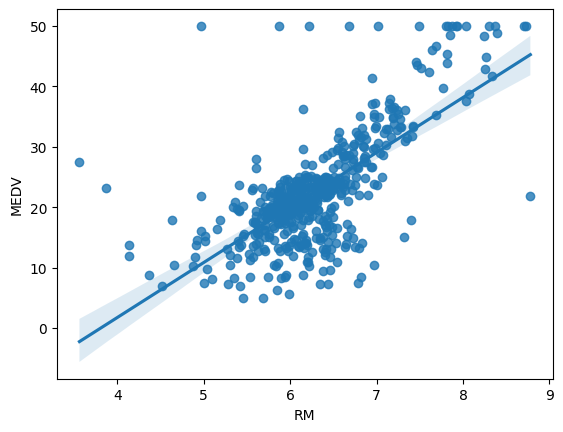

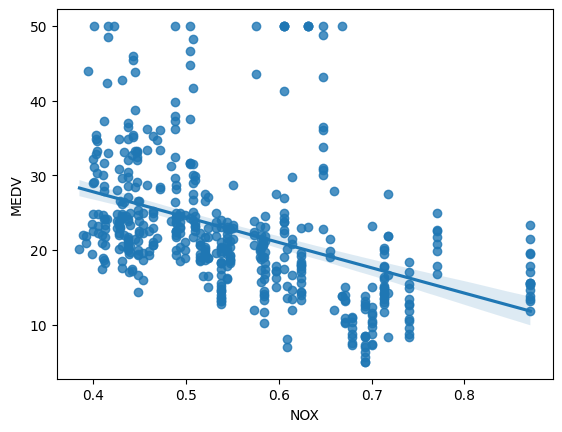

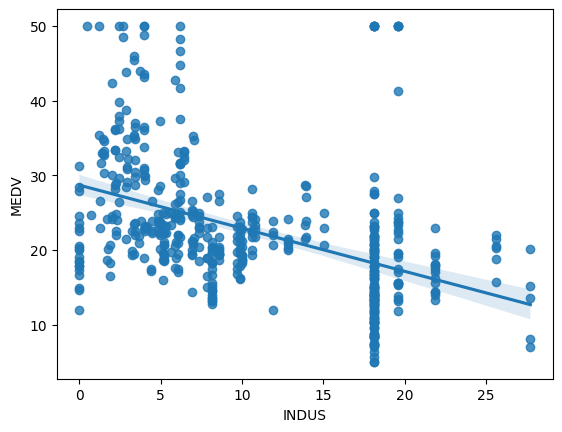

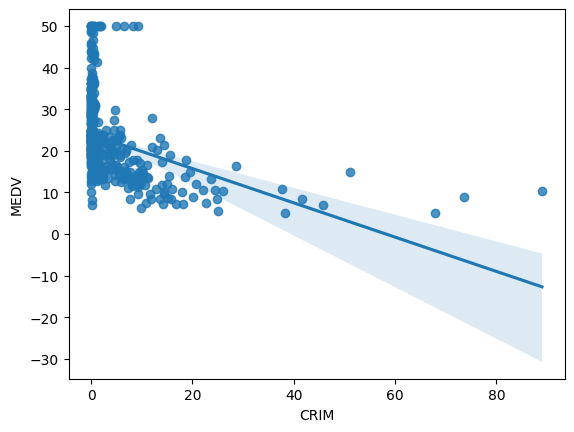

In [17]:
# N0w Visualizing the same with Regression plots to get clear picture
for r in correlated_var:
    sns.regplot(x=boston[r],y=boston['MEDV'])
    plt.show()

### Data preparation for Model Creation

Data Splitting into X and Y.

In [18]:
x=boston.iloc[:,:-1]
y=boston.iloc[:,-1]

In [19]:
x.shape

(506, 13)

In [20]:
# Train-Test Split
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

Transforming or Scaling the data

In [21]:
# Standardising the Data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [22]:
x_train=scaler.fit_transform(x_train)

In [23]:
# Here we are not using the fi_transform to avoid data leakage?
x_test=scaler.transform(x_test)

In [24]:
# converting the Standardisation or Scaling into a pickle object for the app with Flask
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

### Model Creation

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
regression=LinearRegression()

# Training the model
regression.fit(x_train,y_train)

LinearRegression()

In [40]:
# Print the Coefficients and the Intercept
print(regression.coef_)

[-1.09695999  0.75188996  0.01229627  0.9789488  -1.73435964  3.26761551
 -0.87083099 -3.04008689  1.72405084 -1.2891791  -2.13922651  0.99724613
 -3.00559462]


In [41]:
print(regression.intercept_)

23.01581920903955


In [43]:
# on which Parameters, the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [44]:
# Prediction with the test data
reg_pred=regression.predict(x_test)
reg_pred

array([30.61657164, 36.71676525, 14.95849931, 25.11833137, 18.17129837,
       22.67808419, 20.05769163, 14.65806438, 21.59289205, 20.46487094,
       25.39444789, 18.61513387, -5.6915843 , 21.69575952, 18.56271012,
       30.21482592, 19.46995426,  5.97585191, 40.68785029, 16.83546764,
       30.1186887 , 30.07553476, 11.45080276, 27.58489241, 17.01462431,
       14.81613954, 26.44628208, 14.36010475, 22.89118492, 19.19384013,
       21.97203474, 24.66689654, 24.52236477, 16.34931989, 16.24300471,
       17.06265582, 30.33299926, 19.86262411, 24.74401497, 28.06692884,
       14.54517067, 31.34059088, 42.71626971, 17.80983371, 26.89420659,
       16.11270597, 13.72522397, 26.18275778, 19.46720696, 29.67786448,
       20.93706842, 35.10100327, 15.83268858, 25.55322247, 39.20906719,
       21.97433804, 18.01885158, 32.52883896, 24.91303991, 13.01405097,
       22.53500069, 30.75868888, 31.41568973, 16.26809661, 20.70677755,
       17.49101726, 19.63571768, 25.91604588, 30.84832514, 11.56

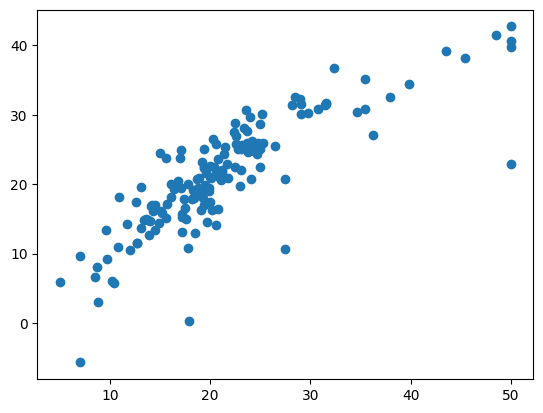

In [46]:
# Plotting a Scatter plot for the Predictions
plt.scatter(y_test,reg_pred)

In [49]:
# Residuals
residuals=y_test-reg_pred

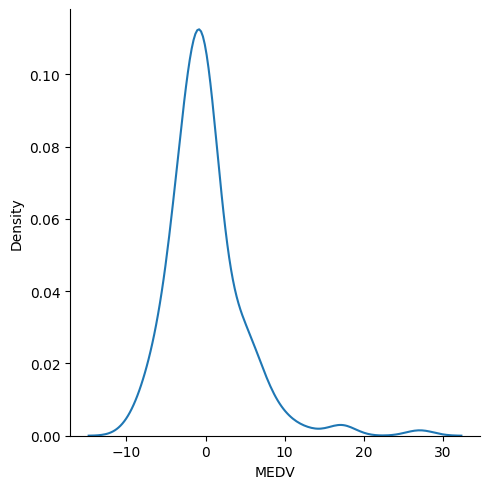

In [50]:
# Plotting the Residuals
sns.displot(residuals,kind='kde')

Observation: Residual Plot shows normal distribution, but with presence of some outliers or bigger errors on the right tail

<Axes: ylabel='MEDV'>

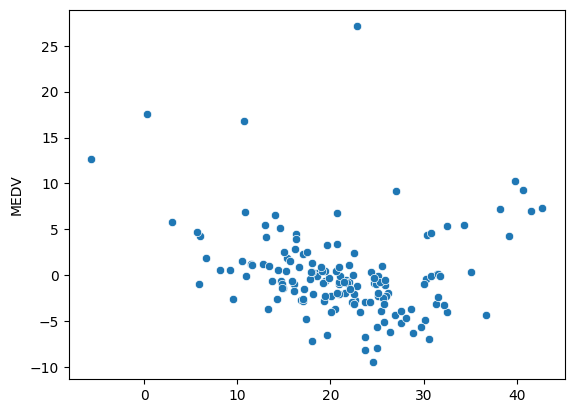

In [ ]:
# Plotting scatter plot between Predictions and Residuals
# Uniform distribution
sns.scatterplot(x=reg_pred,y=residuals)

Observation: The above plot shows the values scattered with no clear pattern thus we can say that our model is working fine at this moment and we can go ahead.

### Performance Metrics

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1953132348573647
22.794533581454527
4.7743621125187525


R Square and Adjusted R Square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares



In [57]:
score=r2_score(y_test,reg_pred)
score

0.6940868795245111

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [58]:
R_adj=1- ((1-score)*((len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)))
R_adj

0.6652689768710229

### New Data Prediction

In [72]:
pre=np.array(x.iloc[0:1,:]).reshape(1,-1)
pre.shape

(1, 13)

In [74]:
# Standardising the new data
scaler.transform(pre)

c:\Users\Bhuvan Kothari\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.40021211,  0.31308058, -1.15017435, -0.27565892, -0.16513629,
         0.34715902, -0.03437408,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -0.95025132]])

In [ ]:
# Predicting
regression.predict(scaler.transform(pre))

c:\Users\Bhuvan Kothari\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.67786448])

### Pickling the Model File for Deployment

In [76]:
import pickle

In [77]:
pickle.dump(regression, open('regmodel.pkl','wb'))

In [78]:
# loading the pickled model
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [79]:
# Prediction using a pickled model
pickled_model.predict(scaler.transform(pre))

c:\Users\Bhuvan Kothari\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.67786448])